<a href="https://colab.research.google.com/github/Auzek2002/Kaggle_Titanic_ML/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dependances**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

**Loading Data**

In [ ]:
titanic_raw = pd.read_csv('/content/train.csv')

**Data Analysis**

In [ ]:

titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_raw.shape

(891, 12)

In [ ]:
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_raw.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
survived = titanic_raw.pop('Survived')
titanic_raw['Survived'] = survived

In [ ]:
titanic_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<ipython-input-214-b7c587cdbf99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_raw.corr()


<Axes: >

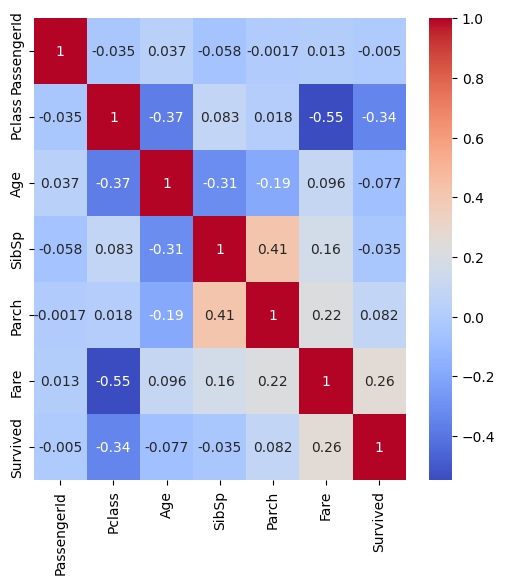

In [ ]:
corr = titanic_raw.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot = True, cmap = "coolwarm")

Checking for Null Values

In [ ]:
titanic_raw.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
mean_age = titanic_raw['Age'].mean()
titanic_raw['Age'].fillna(value =mean_age, inplace = True)

In [ ]:
titanic_raw.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

### **Feature Engineering Combining sibsp and parch**

In [ ]:
titanic_raw['Family'] = titanic_raw['SibSp'] + titanic_raw['Parch']

Dropping features : Name, Ticket and Cabin

In [ ]:
titanic_raw.drop(['Name','Ticket','Cabin','Parch'],axis = 1, inplace = True)

In [ ]:
titanic_raw.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,Survived,Family
0,1,3,male,22.0,1,7.2500,S,0,1
1,2,1,female,38.0,1,71.2833,C,1,1
2,3,3,female,26.0,0,7.9250,S,1,0
3,4,1,female,35.0,1,53.1000,S,1,1
4,5,3,male,35.0,0,8.0500,S,0,0


In [ ]:
titanic_raw.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Fare           0
Embarked       2
Survived       0
Family         0
dtype: int64

In [ ]:
titanic_raw.dropna(axis=0,inplace = True,how = 'any')

In [ ]:
titanic_raw.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Fare           0
Embarked       0
Survived       0
Family         0
dtype: int64

**Lable Encoding:**

In [ ]:
titanic_raw['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
titanic_raw['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
titanic_raw = pd.get_dummies(data = titanic_raw,drop_first = True)

In [ ]:
titanic_raw.head()

,PassengerId,Pclass,Age,SibSp,Fare,Survived,Family,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,7.2500,0,1,1,0,1
1,2,1,38.0,1,71.2833,1,1,0,0,0
2,3,3,26.0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,53.1000,1,1,0,0,1
4,5,3,35.0,0,8.0500,0,0,1,0,1


In [ ]:
survived2 = titanic_raw.pop('Survived')
titanic_raw['Survived'] = survived2

In [ ]:
titanic_raw.head()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,3,22.0,1,7.2500,1,1,0,1,0
1,2,1,38.0,1,71.2833,1,0,0,0,1
2,3,3,26.0,0,7.9250,0,0,0,1,1
3,4,1,35.0,1,53.1000,1,0,0,1,1
4,5,3,35.0,0,8.0500,0,1,0,1,0


In [ ]:
titanic_raw.tail()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Survived
886,887,2,27.000000,0,13.00,0,1,0,1,0
887,888,1,19.000000,0,30.00,0,0,0,1,1
888,889,3,29.699118,1,23.45,3,0,0,1,0
889,890,1,26.000000,0,30.00,0,1,0,0,1
890,891,3,32.000000,0,7.75,0,1,1,0,0


**Creating X and Y (Feature Vector and Target Variable**

In [ ]:
x = titanic_raw.drop('Survived',axis=1)
y = titanic_raw['Survived']

In [ ]:
x.head()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,7.2500,1,1,0,1
1,2,1,38.0,1,71.2833,1,0,0,0
2,3,3,26.0,0,7.9250,0,0,0,1
3,4,1,35.0,1,53.1000,1,0,0,1
4,5,3,35.0,0,8.0500,0,1,0,1


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**Checking If data is balanced or not**

In [ ]:
titanic_raw['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

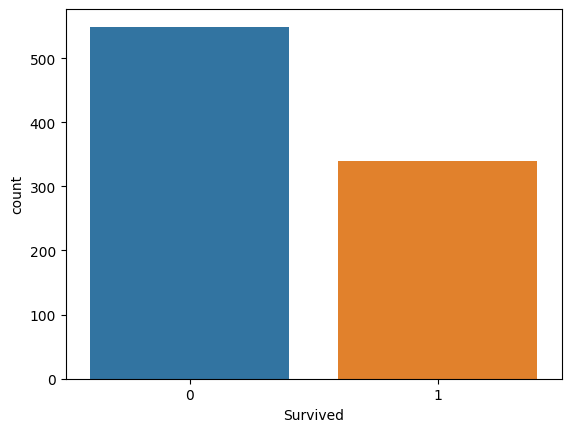

In [ ]:
sns.countplot(x = titanic_raw['Survived'] , data = titanic_raw)

**Solving the problem of Unbalanced data with Over Sampling**

In [ ]:
x_sampled , y_sampled = SMOTE().fit_resample(x,y)

In [ ]:
y_sampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

**Splitting data into train and test samples**

In [ ]:
x_sampled.shape

(1098, 9)

In [ ]:
y_sampled.shape

(1098,)

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=42)

In [ ]:
print(f"Shape of x_train: {x_train.shape}, Shape of x_test: {x_test.shape}, Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of x_train: (878, 9), Shape of x_test: (220, 9), Shape of y_train: (878,), Shape of y_test: (220,)


In [ ]:
y_train.value_counts()

1    442
0    436
Name: Survived, dtype: int64

In [ ]:
y_test.value_counts()

0    113
1    107
Name: Survived, dtype: int64

**Checking if Feature Scaling is needed or not**

In [ ]:
x_train.describe()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,447.677677,2.226651,29.383920,0.462415,34.462212,0.835991,0.554670,0.077449,0.664009
std,255.705851,0.836658,12.953161,0.968288,53.149692,1.454119,0.497286,0.267455,0.472605
min,1.000000,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.250000,1.000000,22.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000
50%,449.000000,2.000000,29.699118,0.000000,15.713734,0.000000,1.000000,0.000000,1.000000
75%,668.500000,3.000000,34.281438,1.000000,32.087475,1.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,512.329200,10.000000,1.000000,1.000000,1.000000


In [ ]:
x_test.describe()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,439.145455,2.172727,28.687830,0.522727,36.975642,0.927273,0.540909,0.072727,0.686364
std,252.103292,0.879592,11.653267,1.221733,52.898566,1.731835,0.499460,0.260281,0.465029
min,4.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,1.000000,21.000000,0.000000,8.018750,0.000000,0.000000,0.000000,0.000000
50%,441.500000,2.000000,29.699118,0.000000,15.645850,0.000000,1.000000,0.000000,1.000000
75%,664.250000,3.000000,35.431862,1.000000,46.900000,1.000000,1.000000,0.000000,1.000000
max,877.000000,3.000000,65.000000,8.000000,438.870472,10.000000,1.000000,1.000000,1.000000


**Feature Scaling**

In [ ]:
scaler = StandardScaler()

Before Scaling:

In [ ]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S
2,3,3,26.000000,0,7.9250,0,0,0,1
6,7,1,54.000000,0,51.8625,0,1,0,1
578,580,3,32.000000,0,7.9250,0,1,0,1
636,638,2,31.000000,1,26.2500,2,1,0,1
844,847,3,29.699118,8,69.5500,10,1,0,1


In [ ]:
x_test.head()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S
44,45,3,19.000000,0,7.8792,0,0,1,0
570,572,1,53.000000,2,51.4792,2,0,0,1
56,57,2,21.000000,0,10.5000,0,0,0,1
602,604,3,44.000000,0,8.0500,0,1,0,1
830,833,3,29.699118,0,7.2292,0,1,0,0


In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

After Scaling:

In [ ]:
x_train

array([[-1.74001152,  0.92485785, -0.26139169, ..., -1.1160306 ,
        -0.28974233,  0.71133918],
       [-1.72435963, -1.46696894,  1.90147493, ...,  0.89603278,
        -0.28974233,  0.71133918],
       [ 0.51777361,  0.92485785,  0.20207972, ...,  0.89603278,
        -0.28974233,  0.71133918],
       ...,
       [-0.57003274, -0.27105554,  0.02434752, ..., -1.1160306 ,
         3.45134245, -1.40579913],
       [-0.56611977, -0.27105554,  0.02434752, ..., -1.1160306 ,
         3.45134245, -1.40579913],
       [ 1.62514483, -1.46696894,  1.43800351, ..., -1.1160306 ,
        -0.28974233,  0.71133918]])

In [ ]:
x_test

array([[-1.57566668,  0.92485785, -0.80210835, ..., -1.1160306 ,
         3.45134245, -1.40579913],
       [ 0.48646983, -1.46696894,  1.82422969, ..., -1.1160306 ,
        -0.28974233,  0.71133918],
       [-1.52871101, -0.27105554, -0.64761788, ..., -1.1160306 ,
        -0.28974233,  0.71133918],
       ...,
       [ 1.40993134,  0.92485785, -0.01000438, ..., -1.1160306 ,
        -0.28974233,  0.71133918],
       [-1.23523807,  0.92485785, -0.46666592, ..., -1.1160306 ,
        -0.28974233,  0.71133918],
       [-0.30786359,  0.92485785,  0.02434752, ..., -1.1160306 ,
         3.45134245, -1.40579913]])

In [ ]:
x_train.max()

8.996088898252909

In [ ]:
x_train.min()

-2.218013535056318

In [ ]:
x_test.max()

7.788879896678265

In [ ]:
x_test.min()

-2.2373248441810905

**Training the model Using Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_train)

In [ ]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
accuracy_score(y_train,y_pred)

0.806378132118451

In [ ]:
precision_score(y_train,y_pred)

0.8207547169811321

In [ ]:
recall_score(y_train,y_pred)

0.7873303167420814

In [ ]:
f1_score(y_train,y_pred)

0.8036951501154734

**On Testing Data**

In [ ]:
y_pred2 = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8272727272727273

In [ ]:
precision_score(y_test,y_pred2)

0.8108108108108109

In [ ]:
recall_score(y_test,y_pred2)

0.8411214953271028

In [ ]:
f1_score(y_test,y_pred2)

0.8256880733944955

**Training The model using Random Forest**

In [ ]:
clf = RandomForestClassifier()

In [ ]:
param_grid = [
    {"n_estimators": [10,100,200,500,1000], "max_depth": [None,5,10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=200)

In [ ]:
final_clf.score(x_test,y_test)

0.8681818181818182

**Using Random Forest on the Full DataSet**

In [ ]:
df = titanic_raw

In [ ]:
df.head()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,3,22.0,1,7.2500,1,1,0,1,0
1,2,1,38.0,1,71.2833,1,0,0,0,1
2,3,3,26.0,0,7.9250,0,0,0,1,1
3,4,1,35.0,1,53.1000,1,0,0,1,1
4,5,3,35.0,0,8.0500,0,1,0,1,0


In [ ]:
df.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Fare           0
Family         0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Survived       0
dtype: int64

In [ ]:
x_final_data = df.drop('Survived',axis=1)
y_final_data = df['Survived']

In [ ]:
x_final_data.head()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,7.2500,1,1,0,1
1,2,1,38.0,1,71.2833,1,0,0,0
2,3,3,26.0,0,7.9250,0,0,0,1
3,4,1,35.0,1,53.1000,1,0,0,1
4,5,3,35.0,0,8.0500,0,1,0,1


In [ ]:
y_final_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
scaler = StandardScaler()

In [ ]:
x_final_data = scaler.fit_transform(x_final_data)
y_final_data = y_final_data.to_numpy()

In [ ]:
x_final_data

array([[-1.73250451,  0.82520863, -0.59049493, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [-1.72861124, -1.57221121,  0.64397101, ..., -1.35991138,
        -0.30794088, -1.62128697],
       [-1.72471797,  0.82520863, -0.28187844, ..., -1.35991138,
        -0.30794088,  0.61679395],
       ...,
       [ 1.72471797,  0.82520863,  0.00352373, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [ 1.72861124, -1.57221121, -0.28187844, ...,  0.73534203,
        -0.30794088, -1.62128697],
       [ 1.73250451,  0.82520863,  0.18104628, ...,  0.73534203,
         3.24737656, -1.62128697]])

In [ ]:
x_final_data.max()

9.668550782149426

In [ ]:
x_final_data.min()

-2.255480861315933

In [ ]:
y_final_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10,100,200,500,1000], "max_depth": [None,5,10], "min_samples_split": [2,3,4]}
]
grid_search = GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_final_data,y_final_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_

In [ ]:
prod_final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [ ]:
prod_final_clf.score(x_final_data,y_final_data)

0.9381327334083239

**For Submission**

In [ ]:
df_final = pd.read_csv('/content/test.csv')
df_final_1 = df_final

In [ ]:
df_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_final['Family'] = df_final['SibSp'] + df_final['Parch']

In [ ]:
df_final.drop(['Name','Ticket','Cabin','Parch'],axis = 1, inplace = True)

In [ ]:
df_final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,Family
0,892,3,male,34.5,0,7.8292,Q,0
1,893,3,female,47.0,1,7.0000,S,1
2,894,2,male,62.0,0,9.6875,Q,0
3,895,3,male,27.0,0,8.6625,S,0
4,896,3,female,22.0,1,12.2875,S,2


In [ ]:
df_final = pd.get_dummies(data = df_final,drop_first = True)

In [ ]:
df_final.head()

,PassengerId,Pclass,Age,SibSp,Fare,Family,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,7.8292,0,1,1,0
1,893,3,47.0,1,7.0000,1,0,0,1
2,894,2,62.0,0,9.6875,0,1,1,0
3,895,3,27.0,0,8.6625,0,1,0,1
4,896,3,22.0,1,12.2875,2,0,0,1


In [ ]:
df_final.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Fare            1
Family          0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [ ]:
mean_age2 = df_final['Age'].mean()
df_final['Age'].fillna(value =mean_age2, inplace = True)

In [ ]:
df_final.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Fare           1
Family         0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
mean_fare = df_final['Fare'].mean()
df_final['Fare'].fillna(value =mean_fare, inplace = True)

In [ ]:
df_final.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Fare           0
Family         0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
x_final = scaler.fit_transform(df_final)

In [ ]:
x_final

array([[-1.72791209,  0.87348191,  0.3349926 , ...,  0.75592895,
         2.84375747, -1.35067551],
       [-1.71962474,  0.87348191,  1.32553003, ..., -1.32287566,
        -0.35164743,  0.74037028],
       [-1.71133739, -0.31581919,  2.51417495, ...,  0.75592895,
         2.84375747, -1.35067551],
       ...,
       [ 1.71133739,  0.87348191,  0.65196458, ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 1.71962474,  0.87348191,  0.        , ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 1.72791209,  0.87348191,  0.        , ...,  0.75592895,
        -0.35164743, -1.35067551]])

In [ ]:
x_final.min()

-2.3854194052306363

In [ ]:
x_final.max()

8.54708052920613

**With Logistic Regression**

In [ ]:
y_pred_final = model.predict(x_final)

In [ ]:
y_pred_final

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

**With Random Forest**

In [ ]:
predictions = prod_final_clf.predict(x_final)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final_df = pd.DataFrame(df_final['PassengerId'])
final_df['Survived'] = y_pred_final
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
final_sub = pd.DataFrame(df_final['PassengerId'])
final_sub['Survived'] = predictions
final_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
final_sub.to_csv('/content/prediction2.0.csv',index=False)